## **Importing the *Mathematical* Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import math

# **Importing the Graphical Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# **Importing the Dataset**

In [ ]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

# **Getting some information from the Dataset**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [ ]:
dataset.columns[1]

'Ad 2'

# **Implementing Upper Confidence Boundary**

In [ ]:
N_users = len(dataset[dataset.columns[0]])
n_columns = len(dataset.columns)
ads_selected = []
numbers_of_selections = list(np.zeros(n_columns,dtype= 'int')) 
sums_of_rewards = list(np.zeros(n_columns,dtype= 'int')) 
total_reward = 0

for n in range(0,N_users):
  ad = 0
  max_upper_bound =  0
  for i in range(0,n_columns):
    if (numbers_of_selections[i] > 0):
      average_reward = float(sums_of_rewards[i] / numbers_of_selections[i])
      delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad] 
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

In [ ]:
type(n_columns)

int

In [ ]:
numbers_of_selections

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [ ]:
sums_of_rewards 

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

# **Visualising the results**

Text(0, 0.5, 'Number of times each ad was selected')

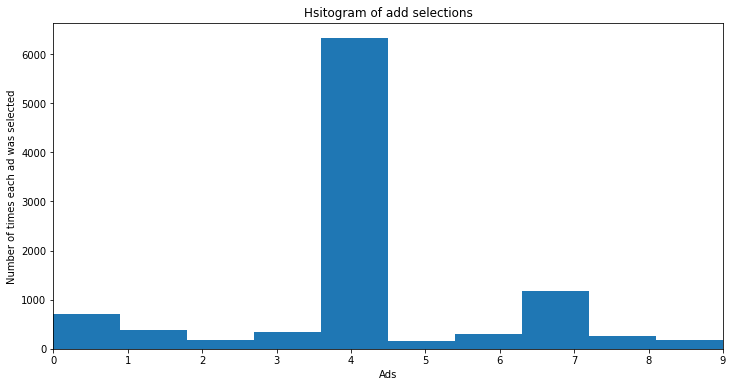

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(ads_selected,bins = 10)
plt.xlim((0,9))
plt.title('Hsitogram of add selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')